In [1]:
import numpy as np

In [19]:
class Kmeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k=k
        self.max_iters=max_iters
        self.tol=tol
        self.centroids = None
        self.labels = None


    def fit(self,X):
        n_samples, n_features = X.shape

        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_indices]

        for _ in range (self.max_iters):
            distances=self._compute_distances(X)
            self.labels=np.argmin(distances,axis=1)

            new_centroids = np.array([X[self.labels==i].mean(axis=0) if len(X[self.labels==i])>0 else self.centroid[i] 
                                     for i in range (self.k)
                                     ])
            if np.all(np.linalg.norm(self.centroids - new_centroids, axis=1) < self.tol):
                break

            self.centroids=new_centroids

    def _compute_distances(self,X):
        return np.linalg.norm(X[:,np.newaxis] - self.centroids, axis=2)


    def predict(self,x):
        distances = self._compute_distances(x)
        return np.argmin(distances, axis=1)
            

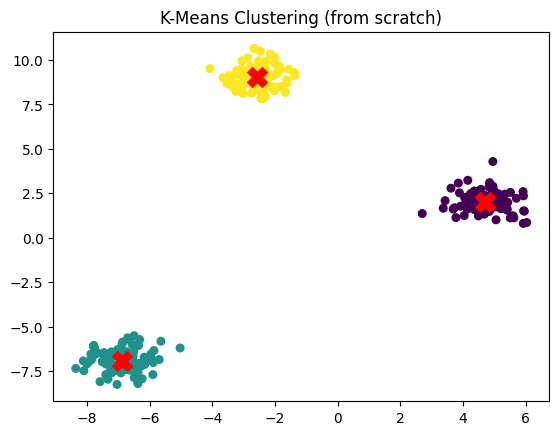

In [21]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)

# Run KMeans
kmeans = Kmeans(k=3)
kmeans.fit(X)
labels = kmeans.predict(X)

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=200, marker='X')
plt.title("K-Means Clustering (from scratch)")
plt.show()